# Import the libraries 

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display

import statsmodels.api as sm

from sklearn import metrics
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

Data Exploration

In [83]:
#Loading data
# Import the data 
df_train = pd.read_csv('House_train.csv')

In [85]:
#Importing the test data
df_test=pd.read_csv('House_test.csv')

In [84]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [86]:
#To check on the first few

df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [87]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [88]:
#To check on the shape of the dataframe
df_train.shape

(1168, 81)

In [89]:
df_test.shape

(292, 80)

In [90]:
#To check on the datatype of the dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [91]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [10]:
#We have columns with null values which can be treated later

In [92]:
#To check for outliers using describe method for statistical analysis
df_train.describe(percentiles=[.25, .5, .75, .9])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
90%,1307.300000,120.000000,96.00000,14311.400000,8.000000,7.000000,2006.000000,2007.000000,320.000000,1070.300000,...,261.300000,132.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,277650.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
#We can see some outliers in few columns like LotFrontage, LotArea, MaxVnrArea, etc. We will visualise it in a while during data cleaning

#Target variable is SalePrice

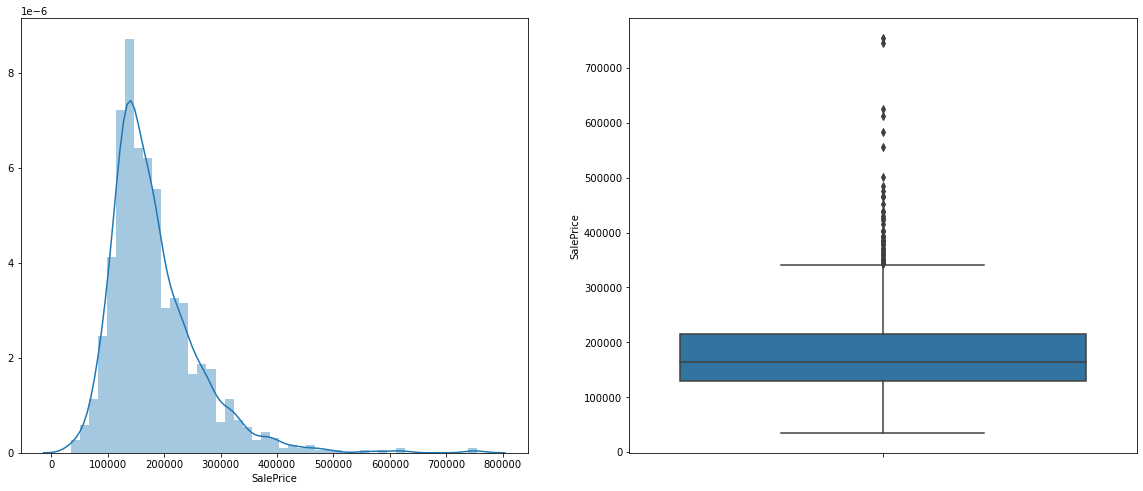

In [93]:
# saleprice distribution
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(df_train.SalePrice)

plt.subplot(1,2,2)
sns.boxplot(y=df_train.SalePrice)
plt.show()

In [94]:
#To check on the target variable distribution statistically
print(df_train.SalePrice.describe(percentiles = [0.25,0.50,0.75,0.90,1]))

count      1168.000000
mean     181477.005993
std       79105.586863
min       34900.000000
25%      130375.000000
50%      163995.000000
75%      215000.000000
90%      277650.000000
100%     755000.000000
max      755000.000000
Name: SalePrice, dtype: float64


Observations from the above visualisation and statistical distribution
1.SalePrice has a slight right-skewed distribution.
2.Most prices seem to be below 350,000

In [16]:
#Let us see the affect of log distribution of sale price

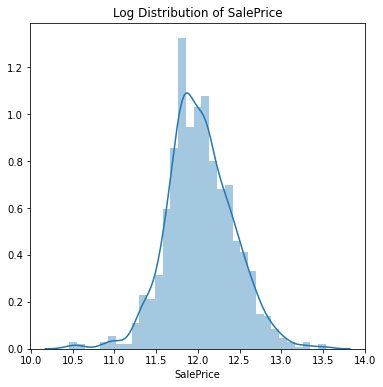

In [95]:
# log distribution of saleprice
plt.figure(figsize=(6,6))
sns.distplot(np.log(df_train['SalePrice']))
plt.title('Log Distribution of SalePrice')
plt.show()

In [18]:
#Now the graph is a normal curve .We will need to do this tranformation during data preparation before modelling

Data Cleaning

In [19]:
#Since there are many columns ,lets drop the columns who have unique values and wont be useful in predictions

In [96]:
df_train.columns[df_train.nunique()==1]

Index(['Utilities'], dtype='object')

In [97]:
#count of unique elements in utilities
df_train.Utilities.nunique()

1

In [98]:
#Lets delete the column

del df_train['Utilities']

In [99]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,Inside,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,Inside,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,CulDSac,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,Inside,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,FR2,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,Inside,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,FR2,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,Inside,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [100]:
#Exhibiting the same change on test set
del df_test['Utilities']

Handling missing values

In [101]:
#To Find out the columns with null values 
round(100*df_train.isnull().sum()/len(df_train.index),2).sort_values(ascending=False).head(20)


PoolQC          99.40
MiscFeature     96.23
Alley           93.41
Fence           79.71
FireplaceQu     47.17
LotFrontage     18.32
GarageFinish     5.48
GarageQual       5.48
GarageCond       5.48
GarageType       5.48
GarageYrBlt      5.48
BsmtExposure     2.65
BsmtFinType2     2.65
BsmtQual         2.57
BsmtCond         2.57
BsmtFinType1     2.57
MasVnrArea       0.60
MasVnrType       0.60
RoofStyle        0.00
RoofMatl         0.00
dtype: float64

In [107]:
#To figure out the columns where number of null values is more

null_cols = list(df_train.columns[round(100*df_train.isnull().sum()/len(df_train.index),2)>40])

In [108]:
null_cols_test=list(df_test.columns[round(100*df_test.isnull().sum()/len(df_test.index),2)>40])

In [109]:
null_cols

[]

In [110]:
null_cols_test

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [104]:
df_train.drop(null_cols, axis=1, inplace=True)


In [111]:
df_test.drop(null_cols_test, axis=1, inplace=True)

In [105]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,IR1,Lvl,Inside,Gtl,...,0,0,0,0,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,IR1,Lvl,Inside,Mod,...,0,0,224,0,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,IR1,Lvl,CulDSac,Gtl,...,0,0,0,0,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,IR1,Lvl,Inside,Gtl,...,0,0,0,0,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,IR1,Lvl,FR2,Gtl,...,0,0,0,0,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,IR1,Lvl,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,Reg,Lvl,Inside,Gtl,...,0,0,0,0,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,Reg,Lvl,FR2,Gtl,...,0,0,0,0,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Reg,Lvl,Inside,Gtl,...,172,0,0,0,0,7,2008,WD,Normal,40000


In [112]:
# Find out the remaining columns with null values 
null_cols = round(100*df_train.isnull().sum()/len(df_train.index),2).sort_values(ascending=False)


In [115]:
null_cols_test=round(100*df_test.isnull().sum()/len(df_test.index),2).sort_values(ascending=False)

In [113]:
null_cols = null_cols[null_cols > 0]


In [116]:
null_cols_test = null_cols_test[null_cols_test > 0]

In [114]:
null_cols

LotFrontage     18.32
GarageType       5.48
GarageYrBlt      5.48
GarageFinish     5.48
GarageQual       5.48
GarageCond       5.48
BsmtFinType2     2.65
BsmtExposure     2.65
BsmtFinType1     2.57
BsmtCond         2.57
BsmtQual         2.57
MasVnrType       0.60
MasVnrArea       0.60
dtype: float64

In [117]:
null_cols_test

LotFrontage     15.41
GarageFinish     5.82
GarageType       5.82
GarageCond       5.82
GarageQual       5.82
GarageYrBlt      5.82
BsmtFinType1     2.40
BsmtExposure     2.40
BsmtCond         2.40
BsmtQual         2.40
BsmtFinType2     2.40
MasVnrArea       0.34
Electrical       0.34
MasVnrType       0.34
dtype: float64

Impute null values for above columns

In [118]:
#For categorical variables create a new category 'NA' for null values to avoid loss of information.
#For Numerical variables impute using median value. There are a few outliers so median will be a better choice over mean value.

for col in null_cols.index:
    if df_train[col].dtype == 'object':
        df_train[col] = df_train[col].fillna('NA')
    else:
        df_train[col] = df_train[col].fillna(df_train[col].median())

In [119]:
#Validation

round(100*df_train.isnull().sum()/len(df_train.index),2).sort_values(ascending=False)

SalePrice       0.0
YearRemodAdd    0.0
RoofMatl        0.0
Exterior1st     0.0
Exterior2nd     0.0
               ... 
KitchenAbvGr    0.0
KitchenQual     0.0
TotRmsAbvGrd    0.0
Functional      0.0
Id              0.0
Length: 75, dtype: float64

In [120]:
#For test dataset
for col in null_cols.index:
    if df_test[col].dtype == 'object':
        df_test[col] = df_test[col].fillna('NA')
    else:
        df_test[col] = df_test[col].fillna(df_test[col].median())

In [121]:
#Validation for test set

round(100*df_test.isnull().sum()/len(df_test.index),2).sort_values(ascending=False)

Electrical       0.34
SaleCondition    0.00
ExterCond        0.00
RoofMatl         0.00
Exterior1st      0.00
                 ... 
BedroomAbvGr     0.00
KitchenAbvGr     0.00
KitchenQual      0.00
TotRmsAbvGrd     0.00
Id               0.00
Length: 74, dtype: float64

In [122]:
#Dropping the Id field as it will not impact the target variable (sales price)

df_train.drop(['Id'], axis=1, inplace=True)

In [123]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,70.0,4928,Pave,IR1,Lvl,Inside,Gtl,NPkVill,...,0,0,0,0,0,2,2007,WD,Normal,128000
1,20,RL,95.0,15865,Pave,IR1,Lvl,Inside,Mod,NAmes,...,0,0,224,0,0,10,2007,WD,Normal,268000
2,60,RL,92.0,9920,Pave,IR1,Lvl,CulDSac,Gtl,NoRidge,...,0,0,0,0,0,6,2007,WD,Normal,269790
3,20,RL,105.0,11751,Pave,IR1,Lvl,Inside,Gtl,NWAmes,...,0,0,0,0,0,1,2010,COD,Normal,190000
4,20,RL,70.0,16635,Pave,IR1,Lvl,FR2,Gtl,NWAmes,...,0,0,0,0,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,RL,70.0,9819,Pave,IR1,Lvl,Inside,Gtl,Sawyer,...,0,0,0,0,0,2,2010,WD,Normal,122000
1164,20,RL,67.0,8777,Pave,Reg,Lvl,Inside,Gtl,Edwards,...,0,0,0,0,0,5,2009,WD,Normal,108000
1165,160,RL,24.0,2280,Pave,Reg,Lvl,FR2,Gtl,NPkVill,...,0,0,0,0,0,7,2009,WD,Normal,148500
1166,70,C (all),50.0,8500,Pave,Reg,Lvl,Inside,Gtl,IDOTRR,...,172,0,0,0,0,7,2008,WD,Normal,40000


In [125]:
#For test set
df_test.drop(['Id'], axis=1, inplace=True)

Outlier treatment

In [126]:
df_train.describe(percentiles = [0.25,0.50,0.75,0.90,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.767979,70.807363,10484.749144,6.104452,5.595890,1970.930651,1984.758562,101.696918,444.726027,46.647260,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,41.940650,22.440317,8957.442311,1.390153,1.124343,30.145255,20.785185,182.218483,462.664785,163.520016,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,50.000000,70.000000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,70.000000,79.250000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
90%,120.000000,92.300000,14311.400000,8.000000,7.000000,2006.000000,2007.000000,320.000000,1070.300000,118.200000,...,261.300000,132.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,277650.000000
99%,190.000000,140.330000,36863.520000,10.000000,9.000000,2009.000000,2009.000000,802.600000,1583.890000,869.990000,...,502.970000,283.980000,265.320000,168.000000,265.330000,0.000000,915.500000,12.000000,2010.000000,443943.500000
max,190.000000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


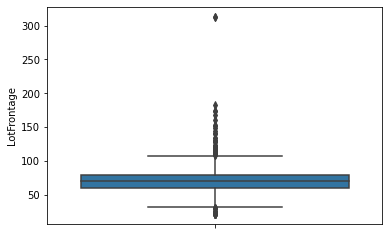

In [127]:
#Lot frontage has some outliers lets visualise it.Lets use boxplot to detect outlier

sns.boxplot(y=df_train.LotFrontage)
plt.show()


In [128]:
#looks like only fewer outliers above value 200

df_train[df_train.LotFrontage > 200]["LotFrontage"].count()

2

In [129]:
#Value
df_train[df_train.LotFrontage > 200]["LotFrontage"]

592     313.0
1053    313.0
Name: LotFrontage, dtype: float64

In [55]:
#LotFrontage of 313 feet looks like an error in reading and an artificial outlier. We will see its value for large area plots

In [130]:
#LotArea
df_train[(df_train.LotArea > 70000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
113,20,RL,70.0,115149,Pave,IR2,Low,CulDSac,Sev,ClearCr,...,0,0,0,0,0,6,2007,WD,Normal,302000
689,20,RL,62.0,70761,Pave,IR1,Low,Inside,Mod,ClearCr,...,0,0,0,0,0,12,2006,WD,Normal,280000
1038,50,RL,70.0,159000,Pave,IR2,Low,CulDSac,Sev,ClearCr,...,0,0,0,0,500,6,2007,WD,Normal,277000
1123,190,RL,70.0,164660,Grvl,IR1,HLS,Corner,Sev,Timber,...,0,0,0,0,700,8,2008,WD,Normal,228950


In [131]:
#Replace ooutlier with median value which seems more appropriate
df_train['LotFrontage'].replace(313, df_train['LotFrontage'].median(), inplace=True)
df_train.shape

(1168, 74)

In [134]:

df_test[df_test.LotFrontage > 200]["LotFrontage"].count()

0

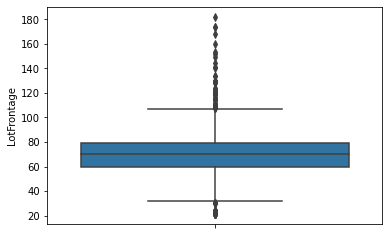

In [135]:
#Validation after outliecr removal

sns.boxplot(y=df_train.LotFrontage)
plt.show()

In [59]:
#Check for Lotarea
#LotArea also has outliers. As we saw LotArea above 100000 is a rare occurance 

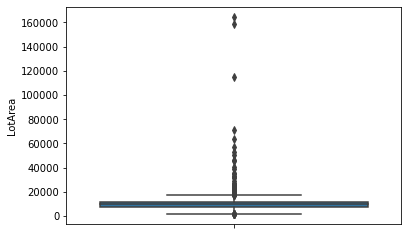

In [136]:
sns.boxplot(y=df_train.LotArea)
plt.show()

In [137]:
df_train[(df_train.LotArea > 70000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
113,20,RL,70.0,115149,Pave,IR2,Low,CulDSac,Sev,ClearCr,...,0,0,0,0,0,6,2007,WD,Normal,302000
689,20,RL,62.0,70761,Pave,IR1,Low,Inside,Mod,ClearCr,...,0,0,0,0,0,12,2006,WD,Normal,280000
1038,50,RL,70.0,159000,Pave,IR2,Low,CulDSac,Sev,ClearCr,...,0,0,0,0,500,6,2007,WD,Normal,277000
1123,190,RL,70.0,164660,Grvl,IR1,HLS,Corner,Sev,Timber,...,0,0,0,0,700,8,2008,WD,Normal,228950


In [62]:
#Very high LotArea has a very high price too which seems consistent with data, hence not making any change for it

DATA VISUALIZATION

UNIVARIATE AND BIVARIATE ANALYSIS

In [138]:
#Getting the list of numerical variables
num_vars = df_train.select_dtypes(include=['float64','int64']).columns.tolist()
num_vars

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [139]:
#Get the list of categorical variables
cat_vars = df_train.select_dtypes(include=['object']).columns.tolist()
cat_vars

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [65]:
#To check if all the columns are included in the lists
print(len(num_vars) + len(cat_vars))

74


In [140]:
#CORRELATION between numericalvariables

corr = df_train[num_vars].corr()
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.367618,-0.124151,0.070462,-0.056978,0.023988,0.056618,0.028215,-0.052236,-0.062403,...,-0.022609,0.017468,-0.004252,-0.043210,-0.013291,0.009583,-0.023503,-0.016015,-0.038595,-0.060775
LotFrontage,-0.367618,1.000000,0.250087,0.221368,-0.060955,0.116222,0.077376,0.176753,0.138468,0.007320,...,0.095790,0.137788,0.031150,0.059055,0.039702,0.109782,-0.001357,0.027902,-0.007699,0.356949
LotArea,-0.124151,0.250087,1.000000,0.107188,0.017513,0.005506,0.027228,0.120192,0.221851,0.056656,...,0.216720,0.093080,-0.007446,0.025794,0.025256,0.097107,0.051679,0.015141,-0.035399,0.249499
OverallQual,0.070462,0.221368,0.107188,1.000000,-0.083167,0.575800,0.555945,0.403985,0.219643,-0.040893,...,0.227137,0.341030,-0.098374,0.045919,0.059387,0.072247,-0.025786,0.090638,-0.048759,0.789185
OverallCond,-0.056978,-0.060955,0.017513,-0.083167,1.000000,-0.377731,0.080669,-0.135133,-0.028810,0.044336,...,0.012290,-0.024899,0.056074,0.040476,0.069463,-0.003603,0.075178,0.005519,0.055517,-0.065642
YearBuilt,0.023988,0.116222,0.005506,0.575800,-0.377731,1.000000,0.592829,0.318562,0.227933,-0.027682,...,0.204830,0.191069,-0.373544,0.037079,-0.058760,0.006408,-0.030008,0.031754,-0.013976,0.514408
YearRemodAdd,0.056618,0.077376,0.027228,0.555945,0.080669,0.592829,1.000000,0.178583,0.114430,-0.044694,...,0.197410,0.238755,-0.193574,0.064763,-0.046220,0.006874,-0.001199,0.024663,0.033265,0.507831
MasVnrArea,0.028215,0.176753,0.120192,0.403985,-0.135133,0.318562,0.178583,1.000000,0.263377,-0.064685,...,0.152083,0.127876,-0.102142,0.019123,0.047375,0.013836,-0.027263,0.012707,-0.013220,0.460535
BsmtFinSF1,-0.052236,0.138468,0.221851,0.219643,-0.028810,0.227933,0.114430,0.263377,1.000000,-0.052145,...,0.192939,0.108802,-0.082351,0.025485,0.033490,0.154769,0.008314,0.007482,0.005614,0.362874
BsmtFinSF2,-0.062403,0.007320,0.056656,-0.040893,0.044336,-0.027682,-0.044694,-0.064685,-0.052145,1.000000,...,0.094690,-0.014103,0.032081,-0.031263,0.076561,0.045990,0.007915,-0.014605,0.038438,-0.010151


HEATMAP

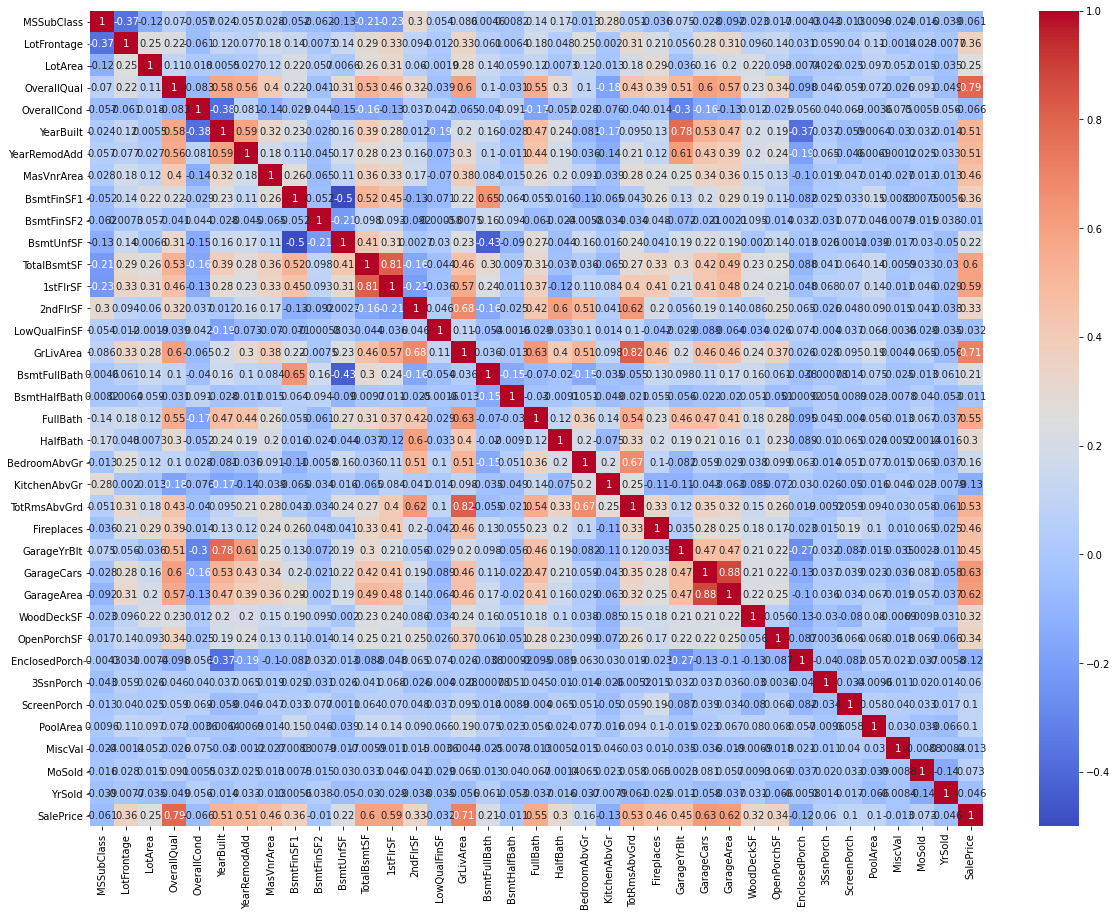

In [67]:
# plotting a heatmap
plt.figure(figsize = (20, 15))
# heatmap
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

In [68]:
#Observations
#SalePrice has high correlation with some variables like OverallQual, GrLivArea, GarageCars, TotalBsmtSF.
#Besides, there is high correlation between some independent variables also like YearBuilt and GarageYrBlt, GrLivArea and TotRmsAbvGrd indicating presence of multicollinearity in the dataset

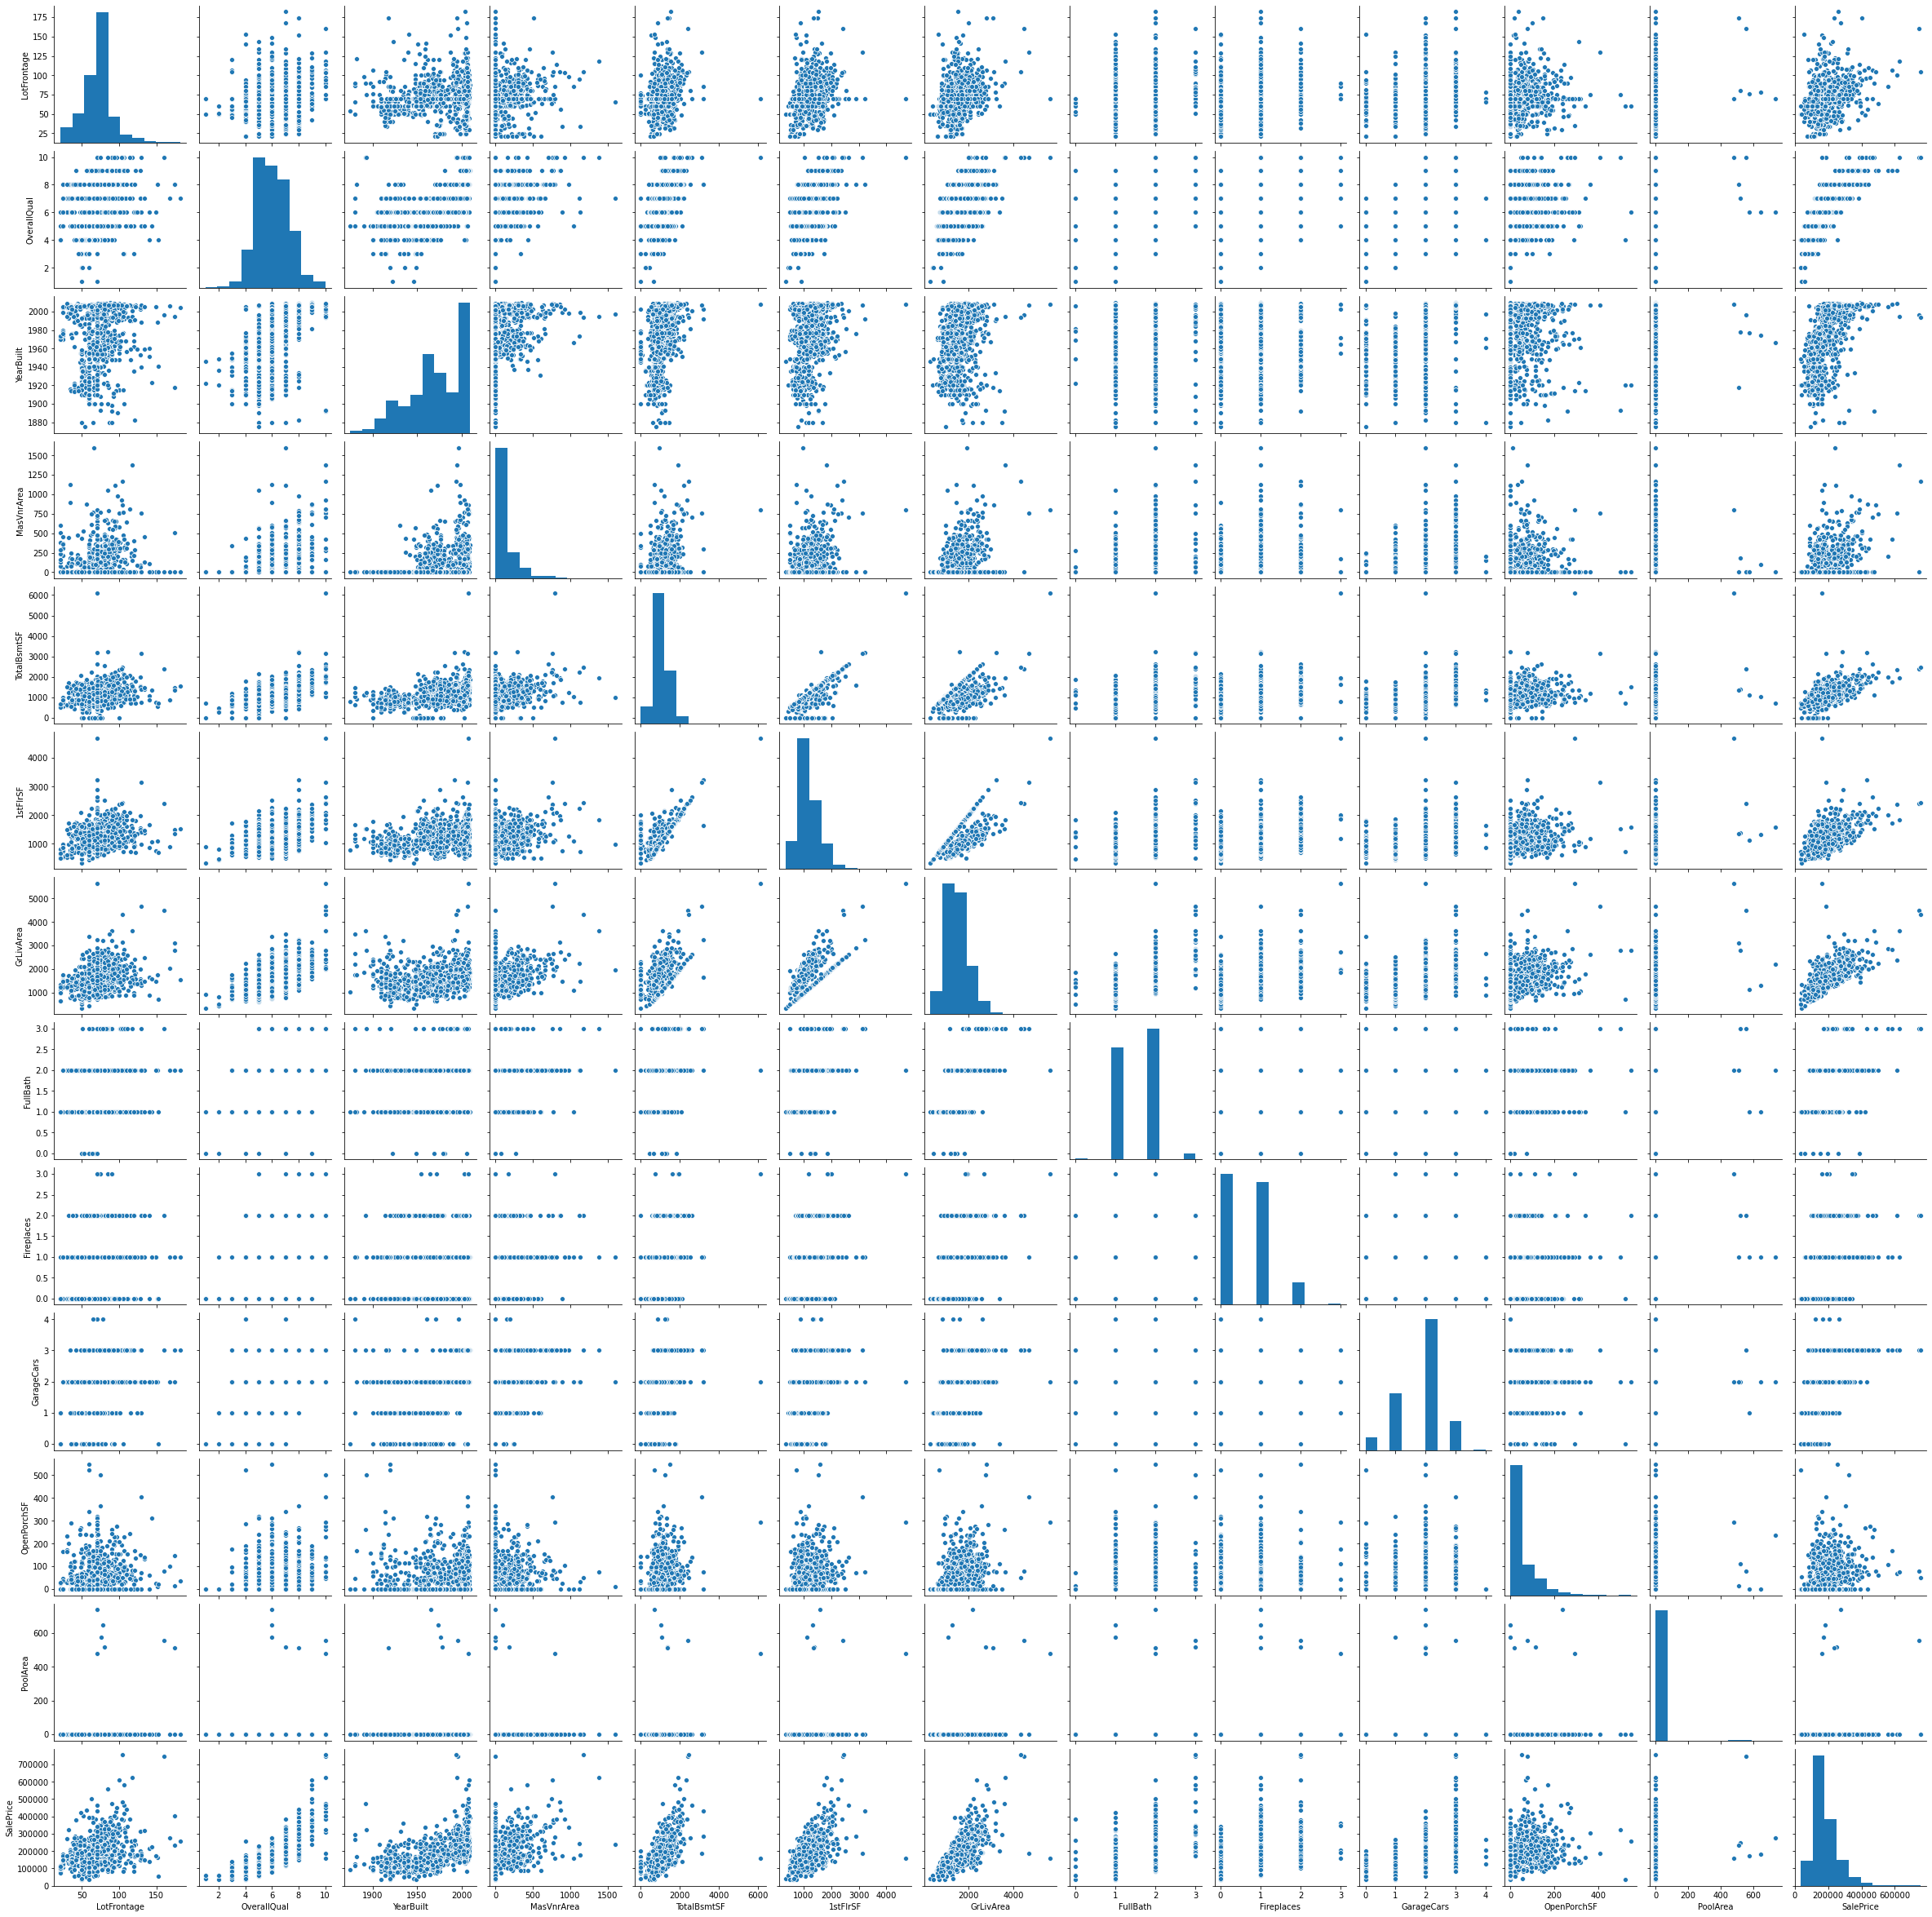

In [69]:
#creating pairplot of few selected important numerical variables based on their correlation values with sale price
sel_num_vars = ['LotFrontage', 'OverallQual', 'YearBuilt', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'Fireplaces', 'GarageCars', 'OpenPorchSF', 'PoolArea', 'SalePrice']
sns.pairplot(df[sel_num_vars])
plt.show()

#Observation
SalePrice has a visible linear correlation with OverallQual, YearBuilt, TotalBsmtSF, 1stFlrSF, GrLivArea, GarageCars

Visualizing categorical variables

In [141]:
#Function to plot countplot and barplot with average price for categorical variables
def univar_plot(var_name):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,7))
    display(Markdown("Analysis of "+var_name+" and Avg. Sale Price"))
    sns.countplot(var_name, data=df_train, ax=ax1, order=sorted(df_train[var_name].unique()))
    sns.barplot(x=var_name, y='SalePrice', data=df_train, estimator=np.mean, ax=ax2, order= sorted(df_train[var_name].unique()))
    ax2.set_ylabel('Avg. Sale Price')
        
    plt.show()

Analysis of MSZoning and Avg. Sale Price

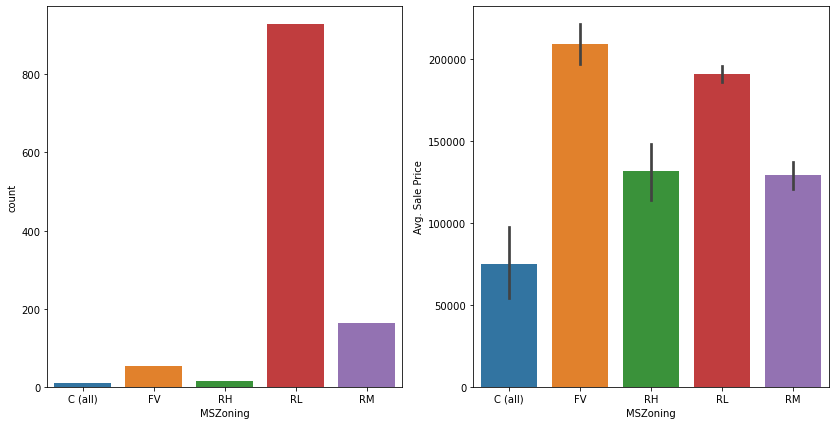

Analysis of Street and Avg. Sale Price

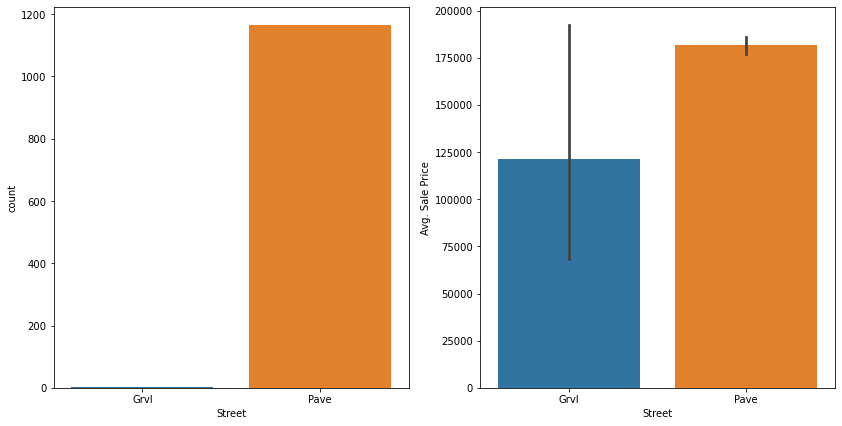

Analysis of LotShape and Avg. Sale Price

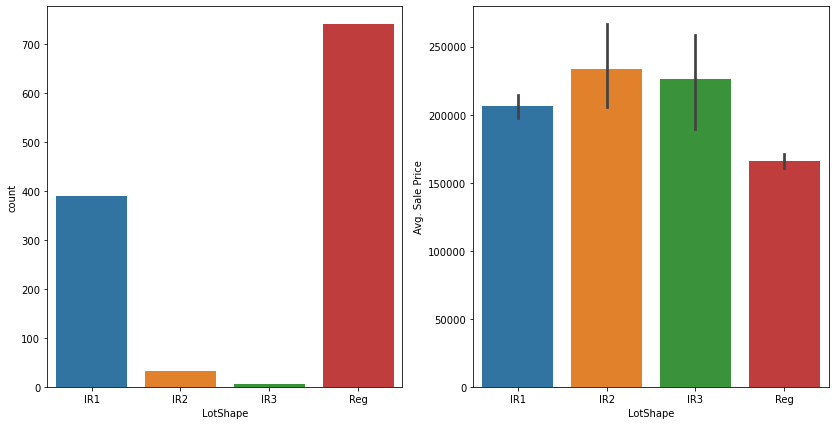

Analysis of LandContour and Avg. Sale Price

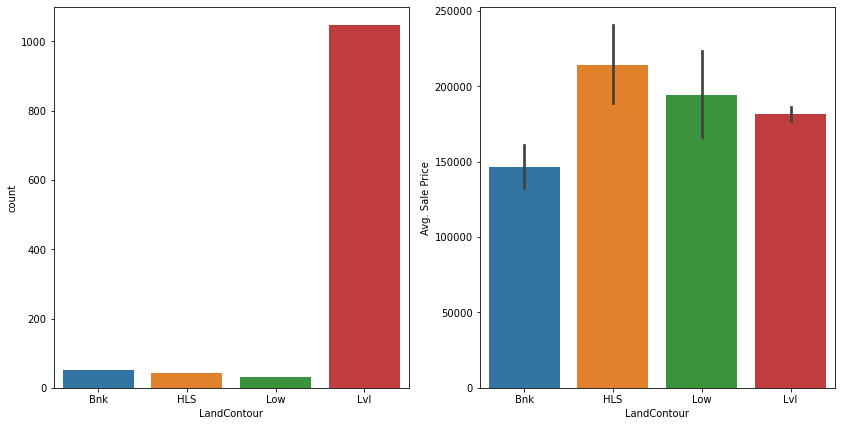

Analysis of LotConfig and Avg. Sale Price

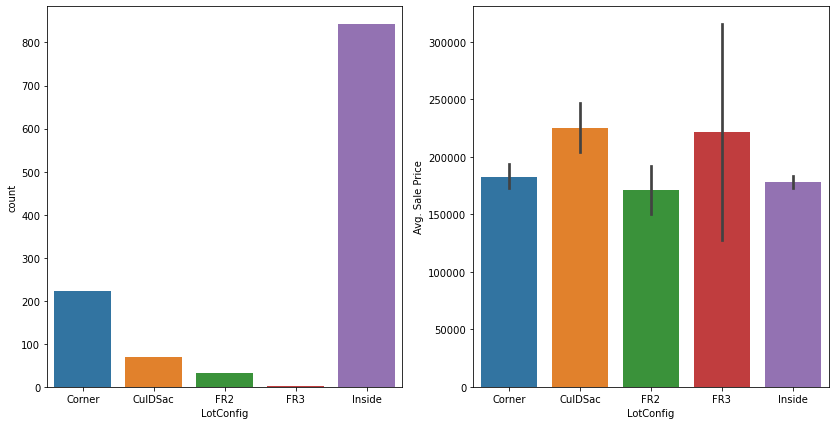

Analysis of LandSlope and Avg. Sale Price

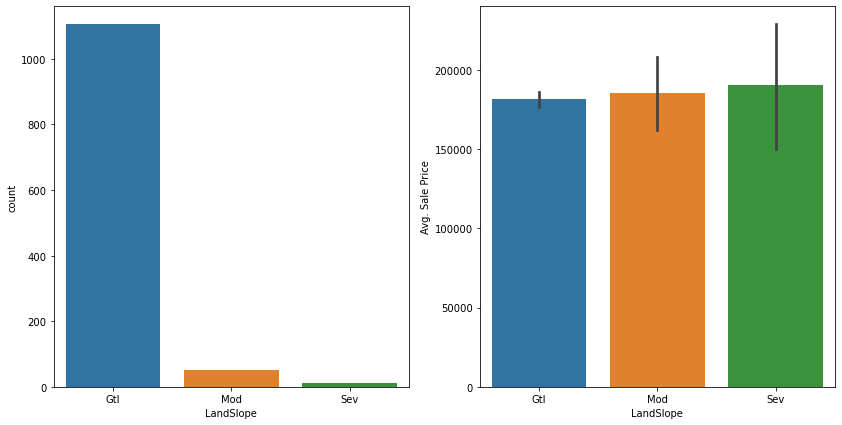

Analysis of Neighborhood and Avg. Sale Price

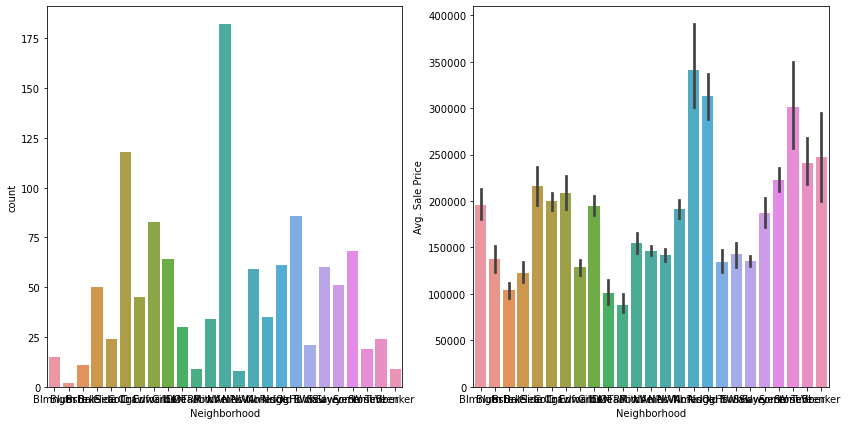

Analysis of Condition1 and Avg. Sale Price

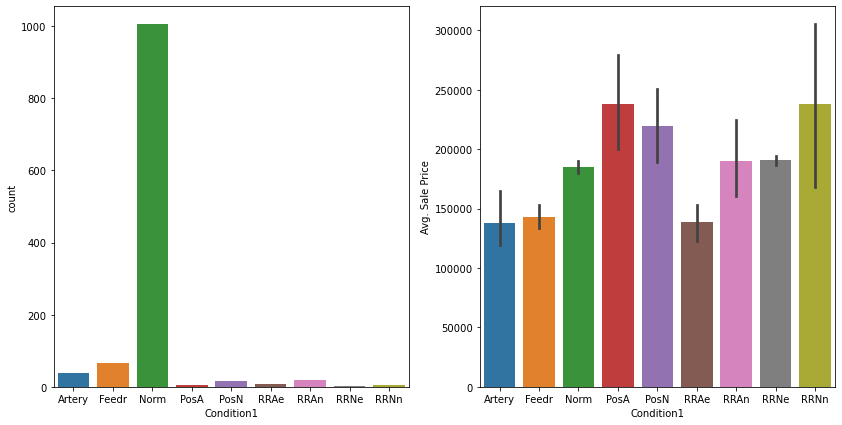

Analysis of Condition2 and Avg. Sale Price

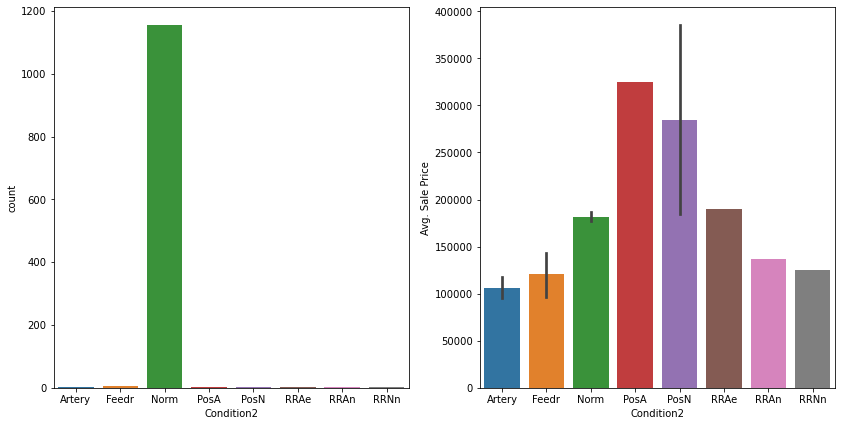

Analysis of BldgType and Avg. Sale Price

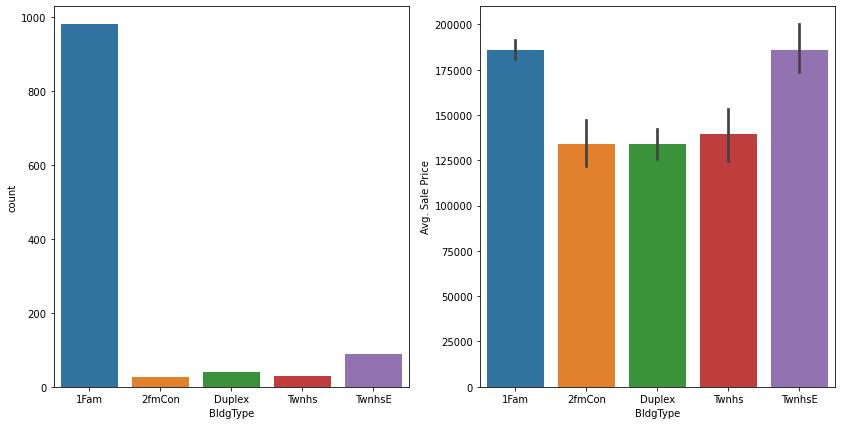

Analysis of HouseStyle and Avg. Sale Price

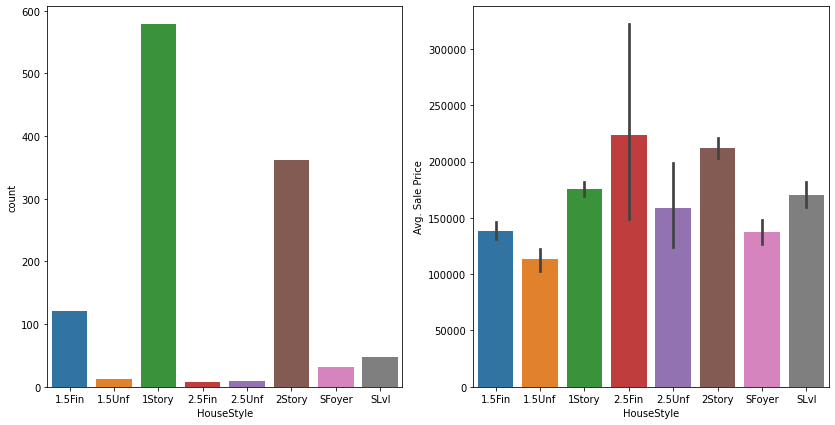

Analysis of RoofStyle and Avg. Sale Price

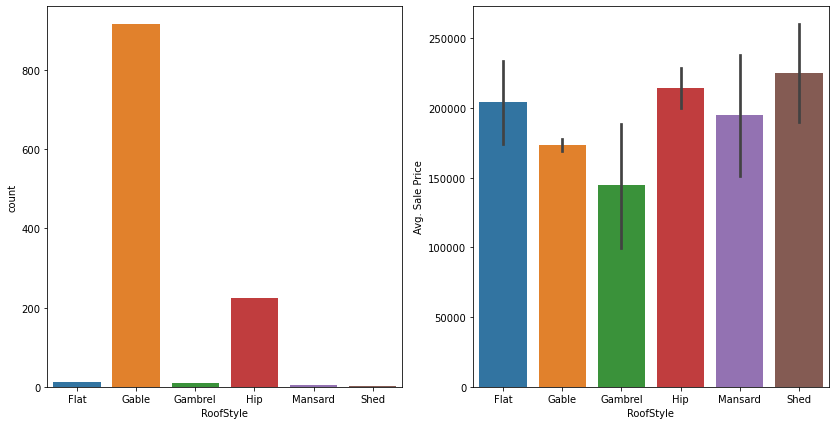

Analysis of RoofMatl and Avg. Sale Price

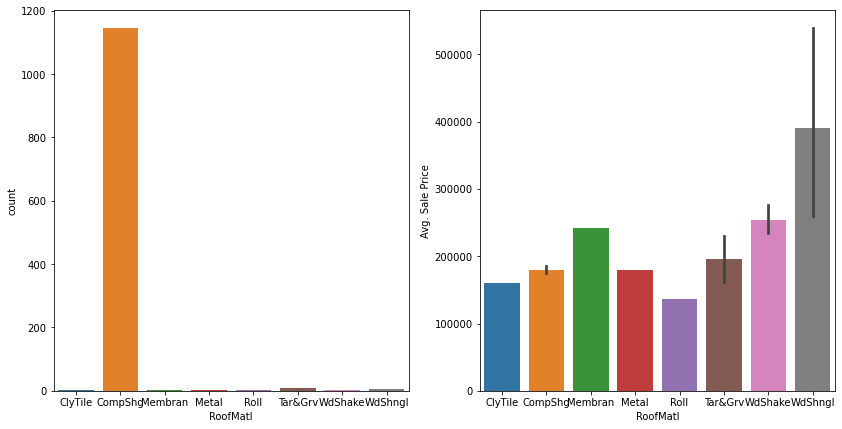

Analysis of Exterior1st and Avg. Sale Price

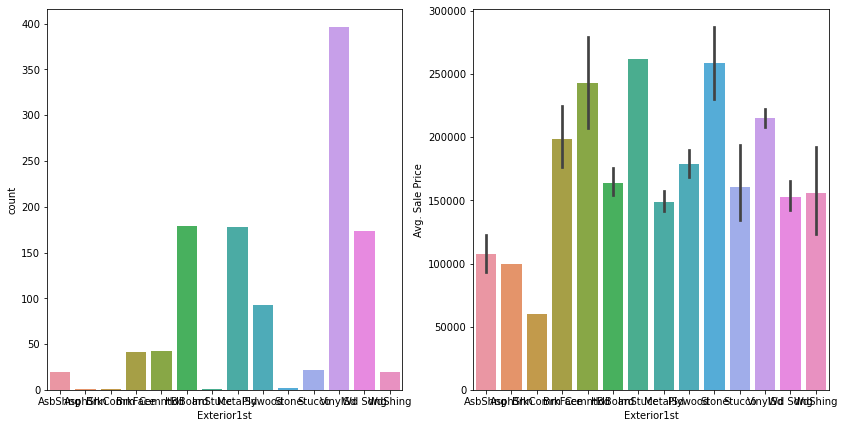

Analysis of Exterior2nd and Avg. Sale Price

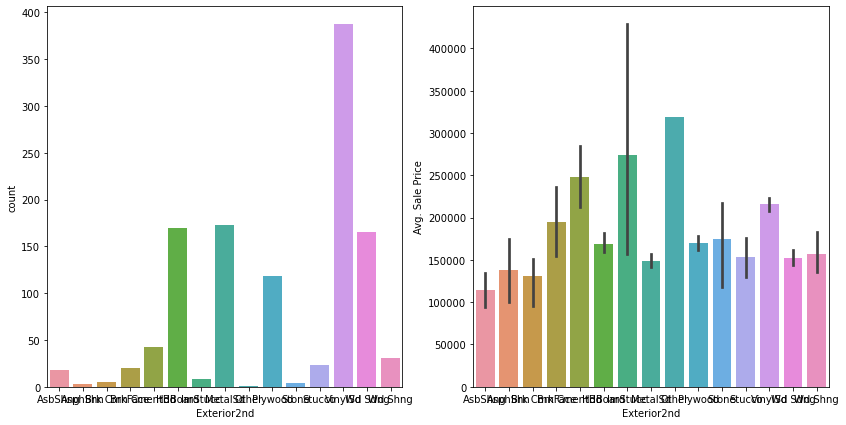

Analysis of MasVnrType and Avg. Sale Price

TypeError: '<' not supported between instances of 'float' and 'str'

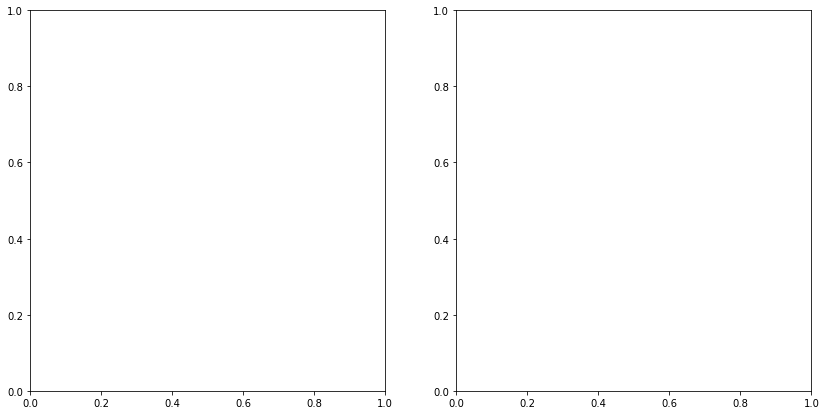

In [71]:
#Univariate plots for categorical variables
#plt.figure(figsize=(20,20))
for var in cat_vars:
    univar_plot(var)

Segmented univariate analysis to check further

In [72]:
def plot_categorical(lst):
    plt.figure(figsize=(20,50))
    cols = 3
    rows = len(lst)//3 + 1
    for i in range(1,len(lst)):
        plt.subplot(rows, 3, i)
        sns.boxplot(x=lst[i-1], y='SalePrice', data=df)
    plt.show

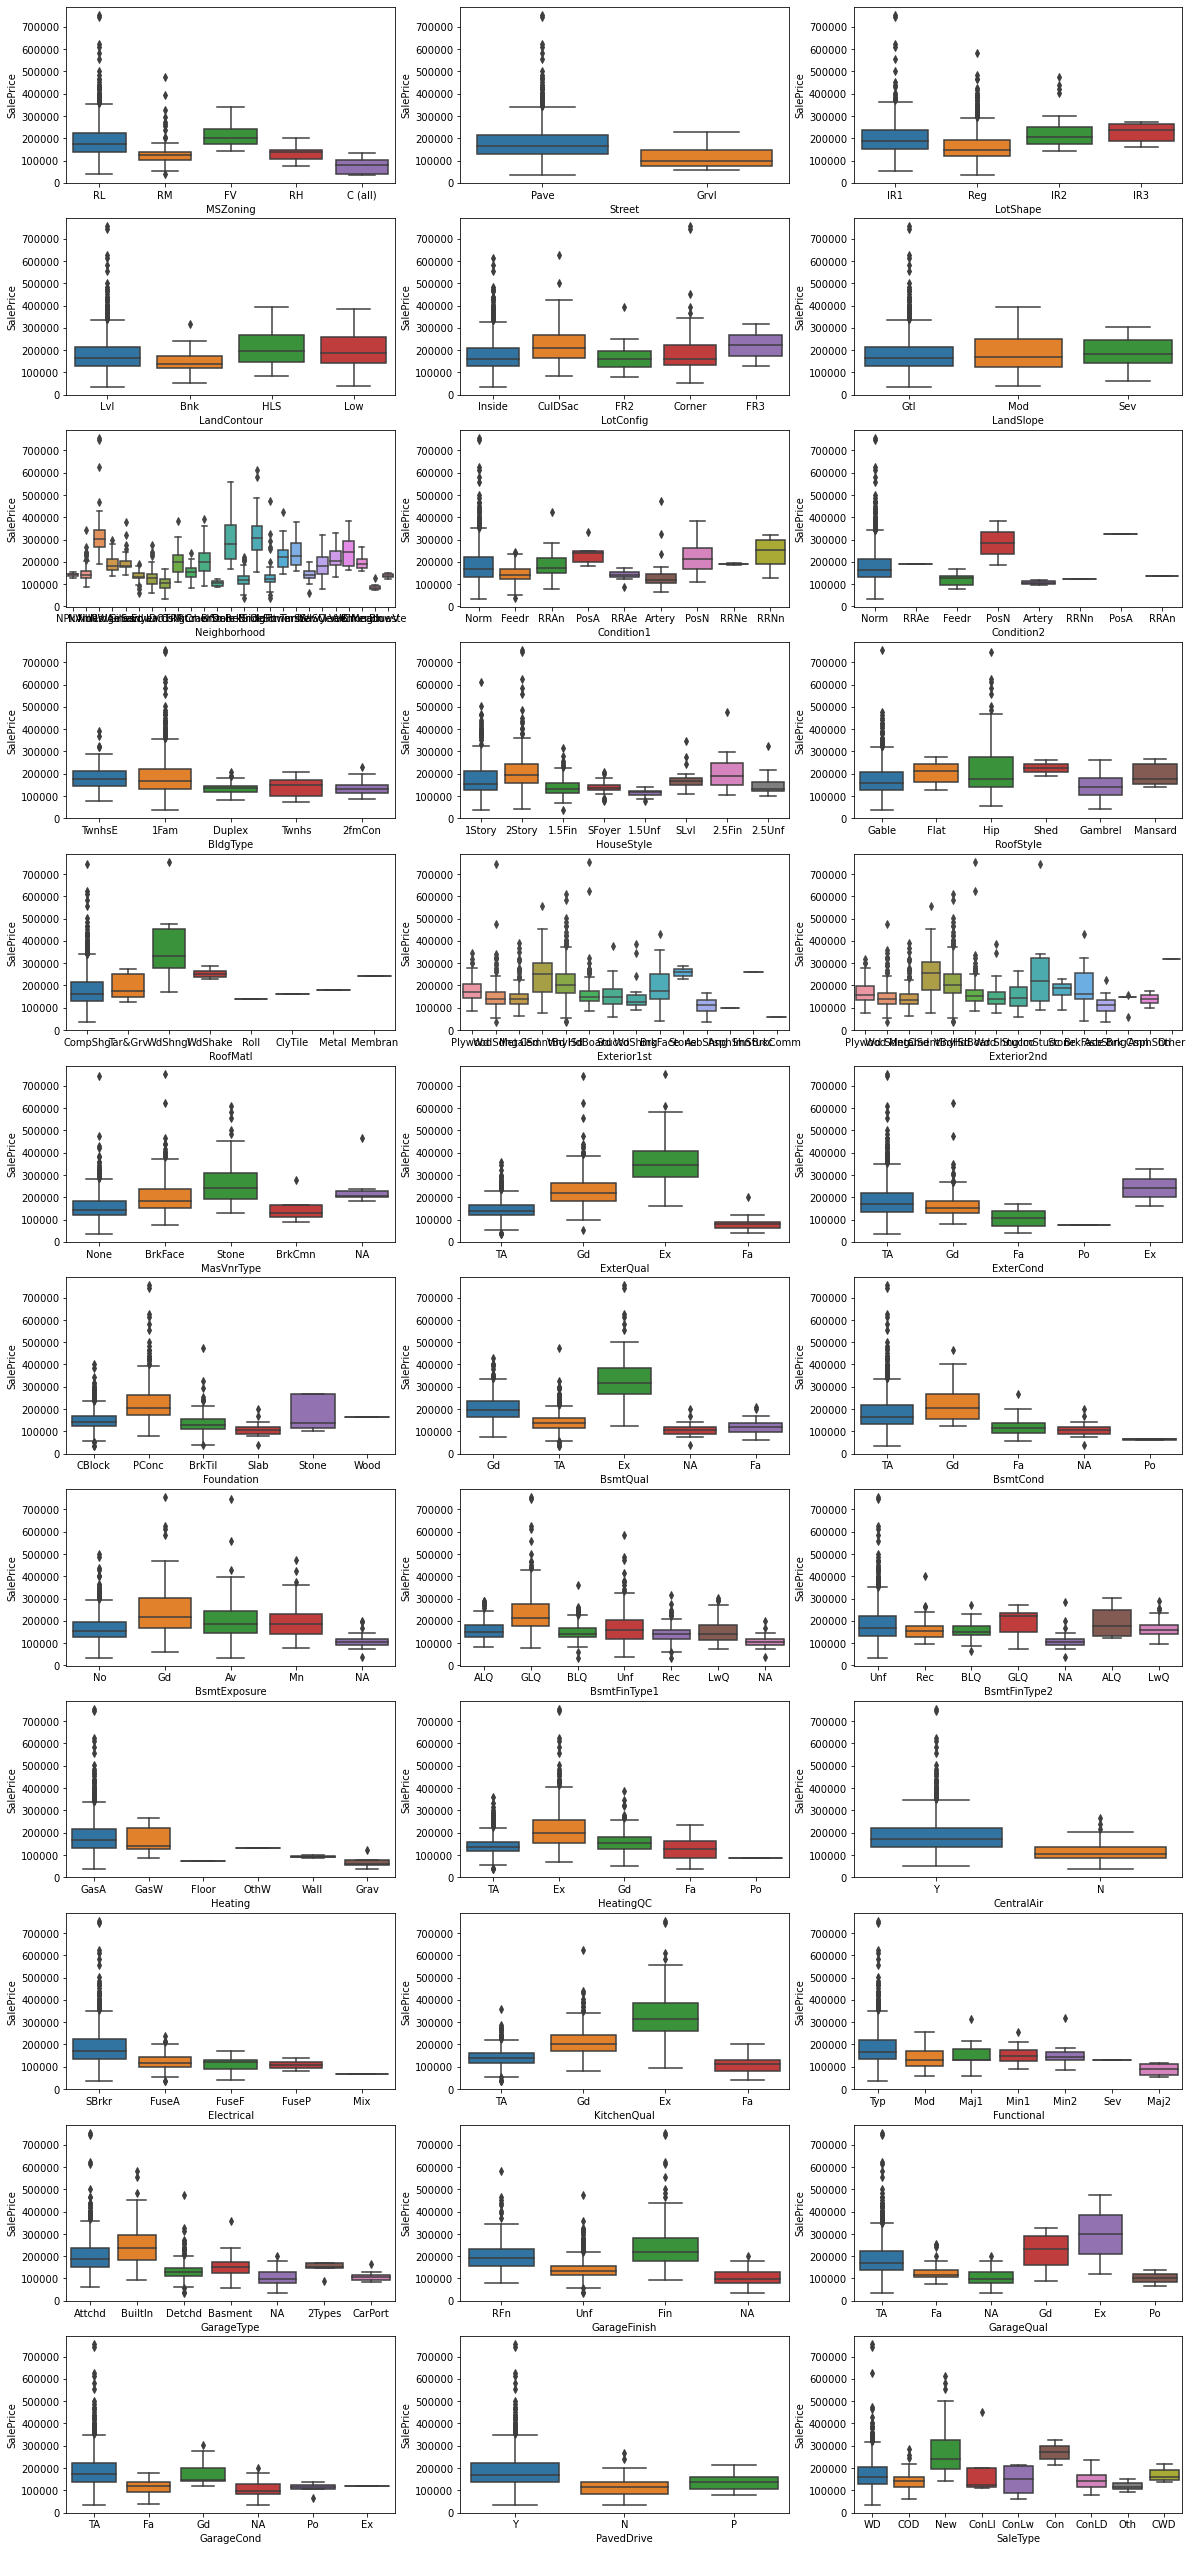

In [73]:
plot_categorical(cat_vars)


Result of Univariate And Segmented Univariate Analysis of Categorical Variables

1.MSZoning: Houses in zone ‘Residential Low Density’ have higher prices and sell more than other categories

2.Street: Houses with ‘Paved’ access have higher average sale price than ‘Gravel’ access

3.LotShape: General shape of property has no significant impact on average Sale Price

4.LandContour: Houses ‘Near Flat/Level’ sell more but houses on hillside have higher average sale price

5.Utilities, LotConfig, LandSlope types do not have much influence on the sale price

6.Neighborhood: Northridge, Northridge Heights, Stone Brook, Timberland, Veenker have the highest average sale price among various locations within Ames city limits

7.Condition1 and Condition2: Houses with Normal condition sell more but Near or Adjacent to positive off-site feature--park, greenbelt, etc. have higher sale price

8.BldgType: Single-family Detached house sell more and have higher process also

9.HouseStyle, RoofStyle, Roof Material, Exterior covering on house, Masonry veneer type do not have significant influence on the sale price

10.ExterQual: Houses with Average/Typical exterior quality sell more but have lower sale price; while those with Excellent exterior quality less but have higher average sale price

11.ExterCond, Foundation do not have significant influence on the sale price

12.BsmtQual: Basement with height between 80 – 99 inches sell more but the basement with height above 100 inches have higher sale price

13.BsmtCond: Good and Excellent general condition have higher sale price

14.BsmtFinType1: Good Living Quarters or Unfinshed sell more and have slightly higher average sale price

Bivariate Analysis of key variables

In [142]:
# Function to create count and bar plot for bivariate analysis
def bi_var_plot(x,y,hue):
    frame = df_train
    f, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,7), dpi=90) 
    sns.countplot(x=x,data=frame,hue=hue,ax=ax1,order=sorted(frame[x].unique()))
    sns.barplot(x=x,y=y,data=frame,hue=hue,ax=ax2,estimator=np.mean, order=sorted(frame[x].unique()))
    plt.show()

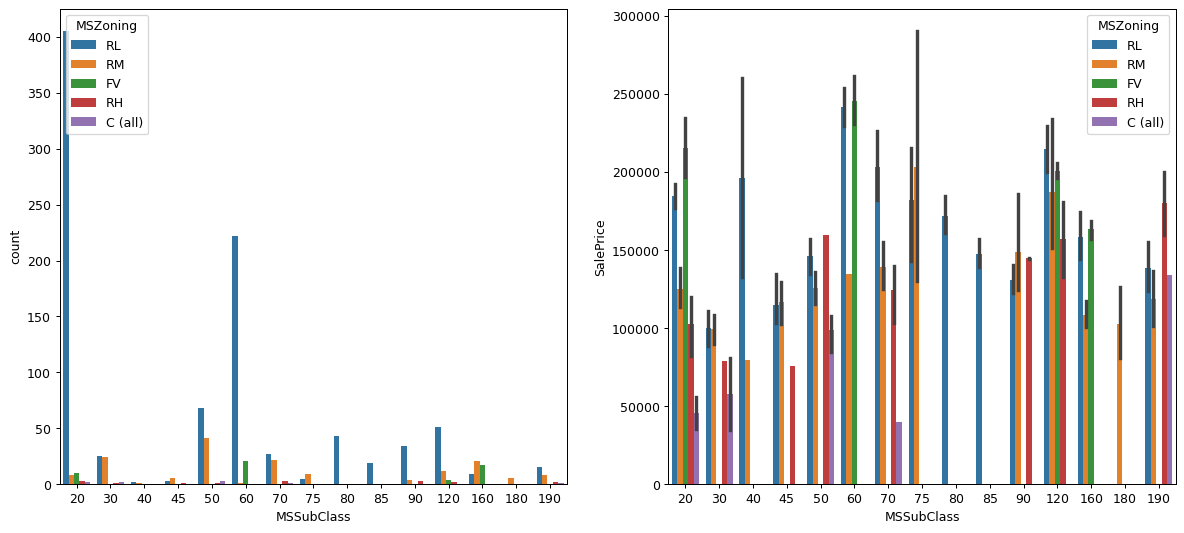

In [143]:

bi_var_plot('MSSubClass','SalePrice','MSZoning')


In [76]:
#As OverallQual improves, SalePrice also goes up with various MSZoning values

DATA PREPARATION

In [144]:
#Derive the age of the house and years
df_train['HouseAge'] = pd.datetime.now().year - df_train['YearBuilt']
df_train['LastRemod'] = pd.datetime.now().year - df_train['YearRemodAdd']
df_train['GarageYrBlt'] = pd.datetime.now().year - df_train['GarageYrBlt']

In [145]:
df_train['OverallQual'] = df_train['OverallQual'].astype('object')
df_train['OverallCond'] = df_train['OverallCond'].astype('object')

In [79]:
#Get y and X from the data frame
y = df['SalePrice']
X = df.drop('SalePrice', axis=1)

In [80]:
#Get the revised list of numerical and categorical variables as we have done soome transformations and created new cols
numcols = X.select_dtypes(include=['float64','int64']).columns.tolist()
catcols = X.select_dtypes(include='object').columns.tolist()

In [81]:
print(numcols)
print(catcols)

['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'HouseAge', 'LastRemod']
['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDr

In [82]:
#Creating dummy variables for all categorical variables
for col in catcols:
    #drop the first column 
    dummies = pd.get_dummies(X[col], drop_first = True)
    # Adding prefix to dummy column names so as to identify it later
    dummies = dummies.add_prefix(f'{col}_')
    # Add the results to the original housing dataframe
    X = pd.concat([X, dummies], axis = 1)
    # Drop original categorical column as we have created the dummies for it
    X.drop([col], axis = 1, inplace = True)

X.head()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,120,70.0,4928,1976,1976,0.0,120,0,958,1078,...,0,0,0,0,1,0,0,0,1,0
1,20,95.0,15865,1970,1970,0.0,351,823,1043,2217,...,0,0,0,0,1,0,0,0,1,0
2,60,92.0,9920,1996,1997,0.0,862,0,255,1117,...,0,0,0,0,1,0,0,0,1,0
3,20,105.0,11751,1977,1977,480.0,705,0,1139,1844,...,0,0,0,0,0,0,0,0,1,0
4,20,70.0,16635,1977,2000,126.0,1246,0,356,1602,...,0,0,0,0,1,0,0,0,1,0
